# Association Mining

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
df = pd.read_csv("bread basket.csv")

In [4]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [5]:
df.describe()

,Transaction
count,20507.000000
mean,4976.202370
std,2796.203001
min,1.000000
25%,2552.000000
50%,5137.000000
75%,7357.000000
max,9684.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [7]:
# There are no missing values.
# convert date_time column in correct format.
df['date_time'] = pd.to_datetime(df['date_time'])

In [8]:
# Decomposing date_time column
df['date'] = df['date_time'].dt.date
df['time'] = df['date_time'].dt.time
df['month'] = df['date_time'].dt.month
df['hour'] = df['date_time'].dt.hour
df['weekday'] = df['date_time'].dt.weekday

In [9]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,date,time,month,hour,weekday
0,1,Bread,2016-10-30 09:58:00,morning,weekend,2016-10-30,09:58:00,10,9,6
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,10,10,6
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,10,10,6
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,10,10,6
4,3,Jam,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,10,10,6


In [10]:
df.hour.unique()

array([ 9, 10, 11, 12, 13, 14,  8, 15, 17, 18,  7, 16, 19, 20, 21,  1, 23,
       22], dtype=int64)

In [11]:
df.weekday.unique()

array([6, 0, 3, 4, 2, 5, 1], dtype=int64)

In [12]:
df['month'] = df['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['January','February','March','April','May','June','July','August','September','October','November','December'])
df['hour'] = df['hour'].replace([1,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,23],['1-2','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24'])
df['weekday'] = df['weekday'].replace([0,1,2,3,4,5,6],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

In [13]:
df.drop(columns='date_time',inplace=True)

In [14]:
df['Item'] = df['Item'].str.strip()

In [15]:
df.head()

,Transaction,Item,period_day,weekday_weekend,date,time,month,hour,weekday
0,1,Bread,morning,weekend,2016-10-30,09:58:00,October,9-10,Sunday
1,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
2,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
3,3,Hot chocolate,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
4,3,Jam,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday


In [16]:
df.Item.nunique()

94

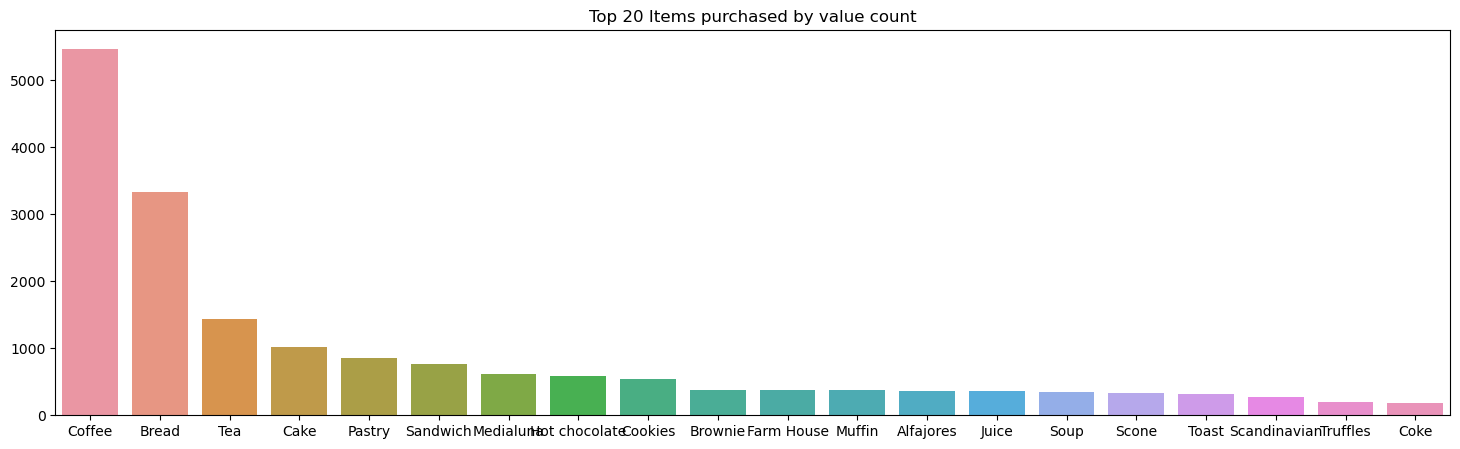

In [17]:
#checking top 20 Items
plt.figure(figsize=(18,5))
sns.barplot(x = df.Item.value_counts().head(20).index, y = df.Item.value_counts().head(20).values)
plt.title('Top 20 Items purchased by value count')
plt.show()

In [18]:
# Number of orders per month
monthly_trans = df.groupby('month')['Transaction'].count().reset_index()
monthly_trans['monthorder'] = [4,8,12,2,1,7,6,3,5,11,10,9]
monthly_trans.sort_values(by = 'monthorder',inplace=True)

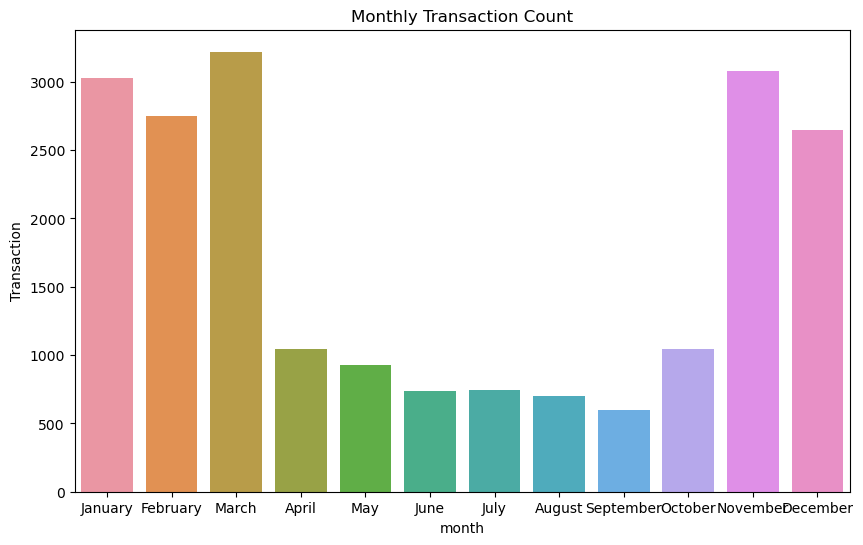

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(x= monthly_trans.month,y = monthly_trans.Transaction)
plt.title("Monthly Transaction Count")
plt.show()

### Most transactions were in March, January, February, November, December

In [20]:
# Number of transactions on each day of week
daily_trans = df.groupby('weekday')['Transaction'].count().reset_index()
daily_trans['dayorder'] = [4,0,5,6,3,1,2]
daily_trans.sort_values(by='dayorder',inplace=True)

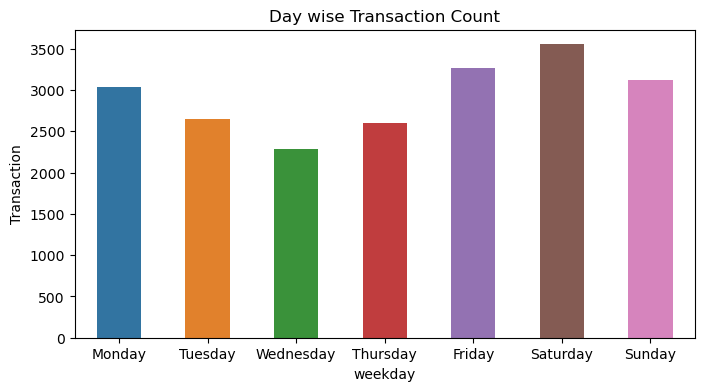

In [21]:
plt.figure(figsize=(8,4))
sns.barplot(x= daily_trans.weekday,y = daily_trans.Transaction,width=.5)
plt.title("Day wise Transaction Count")
plt.show()

#### Relatively more number of orders on Friday, Saturday and Sunday

In [22]:
# Hourly Transaction Rate

hourly_trans = df.groupby('hour')['Transaction'].count().reset_index()
hourly_trans['hourorder'] = [1,10,11,12,13,14,15,16,17,18,19,20,21,22,23,7,8,9]
hourly_trans.sort_values(by='hourorder',inplace=True)


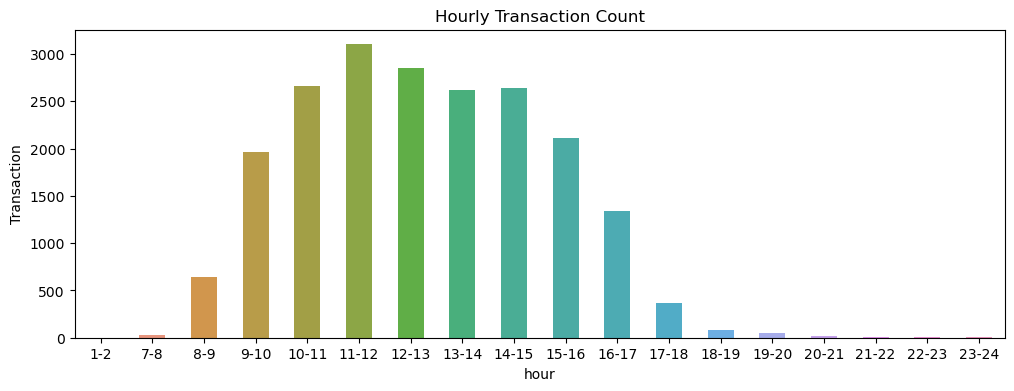

In [23]:
plt.figure(figsize=(12,4))
sns.barplot(x= hourly_trans.hour,y = hourly_trans.Transaction,width=.5)
plt.title("Hourly Transaction Count")
plt.show()

#### Maximum orders are between 10 to 5

In [24]:
dates = df.groupby('date')['Transaction'].count().reset_index()
dates = dates[dates['Transaction']>200].sort_values('date').reset_index(drop=True)
dates = pd.merge(dates,df[['date','weekday']],on='date',how='inner')

dates.drop_duplicates(inplace=True)

In [25]:
dates.head()

,date,Transaction,weekday
0,2016-05-11,275,Wednesday
275,2016-11-19,209,Saturday
484,2016-12-11,221,Sunday
705,2017-01-28,237,Saturday
942,2017-02-18,227,Saturday


#### As seen earlier in graph, Transaction count is high on weekends

In [26]:
data = df.groupby(['period_day','Item'])['Transaction'].count().reset_index().sort_values(['period_day','Transaction'],ascending=False)
day = ['morning','afternoon','evening','night']

0


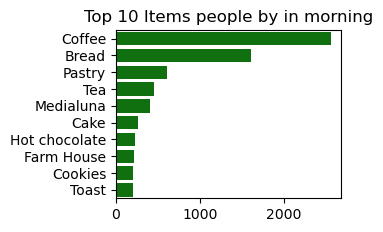

1


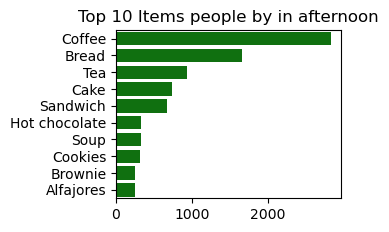

2


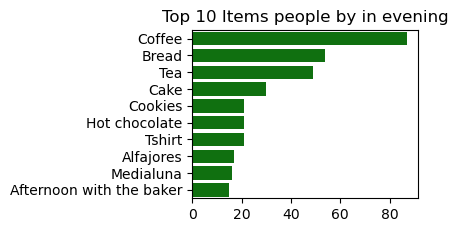

3


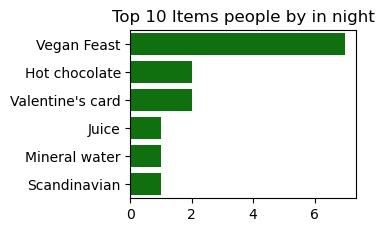

In [27]:
#plt.figure(figsize=(15,8))
for x,y in enumerate(day):
    plt.subplot(2,2,x+1)
    #plt.figure(figsize=(3,3))
    #print(x)
    tmp = data[data.period_day==y].head(10)
    sns.barplot(x=tmp.Transaction, y= tmp.Item, color='green')
    plt.title('Top 10 Items people buy in {}'.format(y))
    plt.xlabel('No. of Transactions')
    plt.ylabel('')
    plt.show()

### Fit the data to apriori algorithm

In [31]:
df_trans = df.groupby(['Transaction','Item'])['Item'].count().reset_index(name='Count')

In [32]:
# Create a sparse matrix


,Transaction,Item,Count
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1
...,...,...,...
18882,9682,Tacos/Fajita,1
18883,9682,Tea,1
18884,9683,Coffee,1
18885,9683,Pastry,1


In [35]:
basket = df_trans.pivot_table(index = 'Transaction', columns='Item',values='Count').fillna(0)
basket.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# convert all non zero values to 1

def encode(x):
    if x == 0:
        return 0
    else:
        return 1

basket_set = basket.applymap(encode)
basket_set.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
freq_items = apriori(basket_set,min_support=0.01,use_colnames=True)
freq_items

C:\Users\vaish\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.036344,(Alfajores)
1,0.016059,(Baguette)
2,0.327205,(Bread)
3,0.040042,(Brownie)
4,0.103856,(Cake)
...,...,...
56,0.023666,"(Toast, Coffee)"
57,0.014369,"(Sandwich, Tea)"
58,0.010037,"(Coffee, Cake, Bread)"
59,0.011199,"(Pastry, Coffee, Bread)"


#### Creating Association Rules

In [45]:
rules = association_rules(freq_items,metric='lift', min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
1,(Coffee),(Alfajores),0.478394,0.036344,0.019651,0.041078,1.130235,0.002264,1.004936,0.220910
2,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
3,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306,0.050231
4,(Brownie),(Coffee),0.040042,0.478394,0.019651,0.490765,1.025860,0.000495,1.024293,0.026259


In [49]:
rules.sort_values(by='confidence',ascending=False, inplace=True)
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
30,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
29,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235,0.204851
19,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
22,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
17,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
25,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
7,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
27,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366,0.088224
12,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
